## COMPUTING ARTIFACT

github : https://github.com/eviofekeze/ComputingArtifact.git

**Goals of Geo-statistics**
- Quantify spatial variability using experimental variogram(semi variogram/variance)
    - This is a new data derived/calculated from data we collect, that we fit our model to to get parameters like range that defines the length scale
- Define/Quantify length scales of spatial variation (Modeling Variogram)
    - Uncertainty in length scales of spatial variation
- Predict values at unsampled locations
    - Krigging: This is the approaches of predicting values by minimizing errors, using spatial variability simultaneously. the output of krigging include estimates and their uncertainties
    
    
**WORK FLOW**    

<!-- ![Flow.png](attachment:Flow.png)[ width=200 height=200]   -->
<img src="Flow.png" width="240" height="300" align="center"/>
Work Flow Chart    
    
**Auto Correlation**: How do points vary, considering their lag(distance)? In many cases points closer to each other are similar, however this is not always true. Estiamtaing the auto correllation is basically estimating this variance amongs points.

**Scale Triplet:** Used to compare different sampling strategies.
- Spacing: Distance between observed points
- Support: Area over which the measure is averaged(e.g size of pixel(remote sensing), size of footprint(Radar))
- Extent: Largest seperation between values, can be seen as range, it is pertinent to note that we cannot perform computation for points that are larger than half of our extent
- Head: First point of a pair
- Tail: Second point of a pair

Conceptually we have
$$ \gamma = \frac{\sum^{m}_{i=1}(u_i - v_i)^2}{m}$$


**Genralized Semi-Variogram Model**
$$\gamma_{GR}=\frac{1}{2N} \sum^{N}_{i=1}\frac{(u_i - v_i)^2}{m^2}$$

$$F = 100\sqrt{2\gamma_{GR}}$$

where 
- $u_i = $ head 
- $v_i = $ tail 
- $m = $ number of pairs
- $N = $ number of points
- $F = $ percentage variation

Note: for this is work well, we require $n\geq 150$

Inteperation of results, if $F= 20$, it implies that measurements vary by $20\%$ the name semi variagram comes from the $1/2$ in the equation

<img src="img/variogram.png" width=600 height=200 >



Theoritical Variogram Model(Image Source: GEOS522 Notes, Fall 2020)

- Sill = Variance of all data, where the variation levels off
- Nugget = y axis intercept, cause by variation in scale that are smaller than the resulution we are measuring


**STOCHASTIC VIEW OF VARIABILITY**

Each point represent some PDF not value, therefore values are not exact everytime
- Ensemble : Range of Possible Values
- reaisation: One memeber of the Ensemble

**SPATIAL COVARIANCE**

Spatial Covariance of two the same variable at different locations
$$C(z_i,z_2) = \frac{1}{n} \sum^{n}_{i-1}(z_{i,1}- \bar{z_i})(z_{i,1} - \bar{z_i})$$

**ASSUMPTION OF STATIONARITY (2nd Order or Weak Stationary)**
1. Assume mean is stationary (20%)
$$\mu = E[z(x)]$$
$$\mu(x_1) \approx \mu(x_2)$$
2. Assume Variance is stationary
$$\sigma^2 \approx E[(z(x)-\mu)^2]$$
3. Assume correlation is constant for any $h = x_i - x_j$
$$C(x_i,x_j) \approx E[(z(x_i)-\mu)(z(x_j)-\mu)]$$

Alternatively
\begin{align}
    C(z(x),z(x+h)) &= E[(z(x)-\mu)(z(x+h)-\mu)]\\
    & = C(h)
\end{align}

**Autocovariance:** Covariance of z with itself, for points seperated by h

**Autocorrelation** normalized covariance as a function of h
$$\frac{C(h)}{C(0)} =  \frac{C(h)}{\sigma^2}$$

**IF ASSUMPTION DOES NOT NOT HOLD**
1. Detrend 33:20
2. Make assupmtions on smaller regions

$$E[z(x) - z(x+h)] = 0$$

**VARIOGRAM/SEMI-VARIOGRAM/SEMIVARIANCE**
\begin{align*}
    \gamma(h) &= \frac{1}{2N} \sum^{N}_{i=1}\big(z(x_i) - z(x_i + h)\big)^2\\
    &= C(0)-C(h)\\
    &= \sigma^2(1-\rho(h))
\end{align*}




**Python Class to Implement the Semi Variogram model**

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

**Python Class to Implement the SemiVariogram Model**

In [47]:
class semivariogram:
    """

    """
    def solve(self, dist, acc):
        """
        Implements a solver to compute, semi variance, autocorrelation,
        for equally spaced data
        
        variance of a parameter of interest over a space
        
        Input:
            dist = horizontal/vertical distance of value we want to compute for
            acc = value we want to investigate it spatial variability
        Output:
            semi_var = semivariance
            cov_ = variance
            autocorr_ = autocorrelation
        
        """
        
        self.dist = dist
        self.acc = acc
        
        self.dx = np.mean(np.diff(self.dist)) #The average spacing between two points in the space 
        self.extent = np.max(self.dist) - np.min(self.dist) # extent or range of the space
        self.h = np.arange(self.dx,self.extent/2+1,self.dx) # lag distance using half of the extent to avoid bias
        self.N = len(self.dist) # number point data     
        
        self.n_pairs = np.zeros(len(self.dist)) # allocate number of pair     
        self.semi_var_ = np.zeros(len(self.h)) # allocate semi variaince
        self.cov_ = np.zeros(len(self.h)) # allocate variance
        self.autocorr_ = np.zeros(len(self.h)) # allocate autocorrelation 
        
        for i in range(0,len(self.h)):
            self.n_pairs[i] = self.N-i-1 # point data at each lag

            #compute semi variance using formular above
            self.semi_var_[i] =  (1/(2 *self.n_pairs[i])) * np.sum((self.acc[0:(self.N-i-1)] - self.acc[(i+1):self.N])**2)
            
            # compute varinace
            self.cov_[i] = np.mean(self.acc[0:(self.N-i-1)] * self.acc[(i+1):self.N]) - (np.mean(self.acc))**2 #covariance
            
            #compute autocorrelation
            self.autocorr_[i] = self.cov_[i]/np.var(self.acc)
        
        
        self.semi_var_ = self.semi_var_
        self.cov_ = self.cov_
        self.autocorr_ = self.autocorr_


**Python Class to Implement the Variogram Model**

In [48]:
class variogramModel:
    """

    """
    def solve(self, h,c,a,type_):
        """
        Variogram using the bounded linear and spherical models
    
        INPUT:
            h = lags
            c = sill
            a = range
            typre_ 'L' for linear and 'S' for spherical
       
        OUTPUT:
        Vm: Modelled varigram
        
        """
        
        self.h = h
        self.c = c
        self.a = a
        self.type_ = type_
        
        
        self.Vm = np.zeros(len(self.h))
        Ix = np.where(self.h < self.a)
        
        
        if (self.type_ == 'L'):
            #lags less than a
            self.Vm[Ix] = self.c*self.h[Ix]/self.a  # Linear 
        elif (self.type_ == 'S'):
            self.Vm[Ix] = self.c*(3*self.h[Ix]/(2*self.a) - 0.5*(self.h[Ix]/self.a)**3) # Spherical 
        
        Ix2 = np.where(self.h>self.a) # lags greater than a
        self.Vm[Ix2] = self.c
        
        
        self.Vm = self.Vm

**Python Class to Implement Model Variogram Error**

In [49]:
class variogramModelError:
    """

    """
    def solve(self, h,V,c,a,type_):
        """
        Variogram using the bounded linear and spherical models
    
        INPUT:
            h = lags
            V = Experimental Variogram
            c = sill
            a = range
            type_ 'L' for linear and 'S' for spherical
       
        OUTPUT:
            RMSE = The root Mean Squared Error of the modelled values and the Semivariogram
            Vm = The modeled Values
        
        solve(self, h,V,c,a,type_)
        """
        
        self.h = h  # lag distance
        self.V = V # Variogram
        self.c = c # Sill
        self.a = a # Range
        self.type_ = type_ # type S or L
        
        
        self.Vm = np.zeros(len(self.h)) # Preallocate Space for modelled variogram
        Ix = np.where(self.h < self.a) #select index less that range
        
        
        if (self.type_ == 'L'):
            #Solve for place less than Using Linear 
            self.Vm[Ix] = self.c*self.h[Ix]/self.a  # Linear 
        elif (self.type_ == 'S'):
            #Sovel for place less than a using Sperical
            self.Vm[Ix] = self.c*(3*self.h[Ix]/(2*self.a) - 0.5*(self.h[Ix]/self.a)**3) # Spherical 
        
        Ix2 = np.where(self.h>self.a) # lags greater than a
        #Model variogram equals varaince
        self.Vm[Ix2] = self.c
        
        #Compute Root Mean Square
        self.rmse = np.sqrt(np.mean((self.Vm - self.V)**2))
                
        self.Vm = self.Vm
        self.rmse = self.rmse

To test this we implement it on a simple dataset, the Devonbdot data set. The Devendbot data is a collection snow accumulation rate along a transect.

In [50]:
devonbdot = pd.read_csv('DevonBdot.csv', header = None)
devonbdot.columns = ['dist','acc']
devonbdot.head()

,dist,acc
0,0,26.355103
1,2,24.566650
2,4,26.040649
3,6,25.549316
4,8,24.205376


In [51]:
help(variogramModelError)

Help on class variogramModelError in module __main__:

class variogramModelError(builtins.object)
 |  Methods defined here:
 |  
 |  solve(self, h, V, c, a, type_)
 |      Variogram using the bounded linear and spherical models
 |      
 |      INPUT:
 |          h = lags
 |          V = Experimental Variogram
 |          c = sill
 |          a = range
 |          type_ 'L' for linear and 'S' for spherical
 |      
 |      OUTPUT:
 |          RMSE = The root Mean Squared Error of the modelled values and the Semivariogram
 |          Vm = The modeled Values
 |      
 |      solve(self, h,V,c,a,type_)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [52]:
dist,acc = np.array(devonbdot['dist']), np.array(devonbdot['acc'])

Next we check is data satisfies the condition for assumptions above.

In [53]:
sec_1 = acc[0:100] # 1st section of accumulation rates
sec_2 = acc[100:200] # 2nd section of accumulation rates
sec_3 = acc[200:300] # 3rd section of accumulation rates
sec_4 = acc[300:400] # 4th section of accumulation rates

pd.DataFrame({'Mean': [np.mean(sec_1),np.mean(sec_2),np.mean(sec_3),np.mean(sec_4)],
              'Variance': [np.var(sec_1),np.var(sec_2),np.var(sec_3),np.var(sec_4)]})

,Mean,Variance
0,18.851112,38.954942
1,18.601579,21.398444
2,15.117402,62.535571
3,19.262674,41.439434


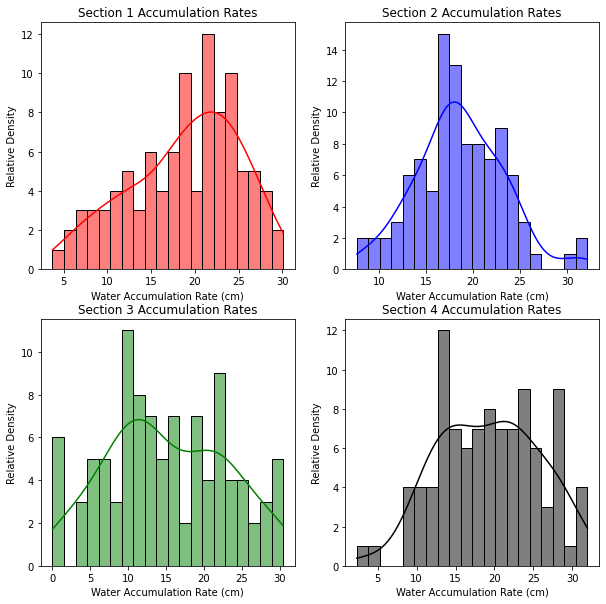

In [54]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10)) # initialize axes

ax1 = axes[0][0]
ax2 = axes[0][1]
ax3 = axes[1][0]
ax4 = axes[1][1]

ys = [sec_1,sec_2,sec_3,sec_4]
ax = [ax1,ax2,ax3,ax4]
color_ = ['red','blue','green','black']

for i in range(4):
    sns.histplot(ys[i], kde=True,
                 bins = 20,
                 color= color_[i],
                 ax = ax[i]) 

    ax[i].set_title('Section ' + str(i+1) + ' Accumulation Rates') # set title
    ax[i].set_ylabel('Relative Density') # set y-axis label
    ax[i].set_xlabel('Water Accumulation Rate (cm)') # set x-axis label

**Implementing the class above**

In [55]:
test = semivariogram()
test.solve(dist,acc)

In [11]:
# test.h

In [12]:
# test.cov_

In [13]:
# test.semi_var_

In [14]:
# test.autocorr_

**Visualization Helper function**

In [63]:
def plot_variogram(dist, acc, figsize = (15,6), color = 'k'):
    temp = semivariogram()
    temp.solve(dist,acc)
    plt.figure(figsize = figsize)
    plt.scatter(temp.h, temp.semi_var_,color = color)
    plt.title('Semivariance Vs lag') # Set Title
    plt.ylabel('Semivariance') # label y axis
    plt.xlabel('Lag (m)')
        
def plot_covariance(dist,acc,figsize = (15,6), color = 'k'):
    temp = semivariogram()
    temp.solve(dist,acc)
    plt.figure(figsize = figsize)
    plt.scatter(temp.h, temp.cov_, color = color) 
    plt.title('Covariance Vs Lag') # Set Title
    plt.ylabel('Covariance') # label y axis
    plt.xlabel('Lag (m)') # # labelx axis
    
    
def plot_autocorr(dist, acc, figsize = (15,6), color = 'k'):
    temp = semivariogram()
    temp.solve(dist,acc)
    plt.figure(figsize = figsize)
    plt.scatter(temp.h, temp.autocorr_, color = color) 
    plt.title('Autocorrelation Vs Lag') # Set Title
    plt.ylabel('Autocorrelation') # label y axis
    plt.xlabel('Lag (m)') # # labelx axis

**Visualization**

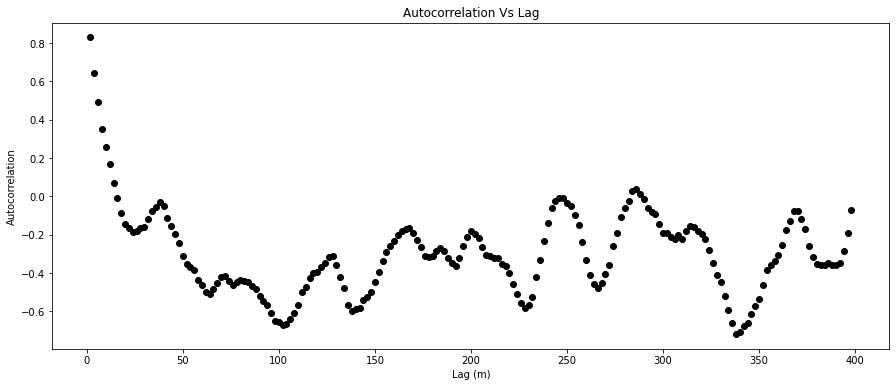

In [64]:
plot_autocorr(dist,acc, figsize = (15,6))

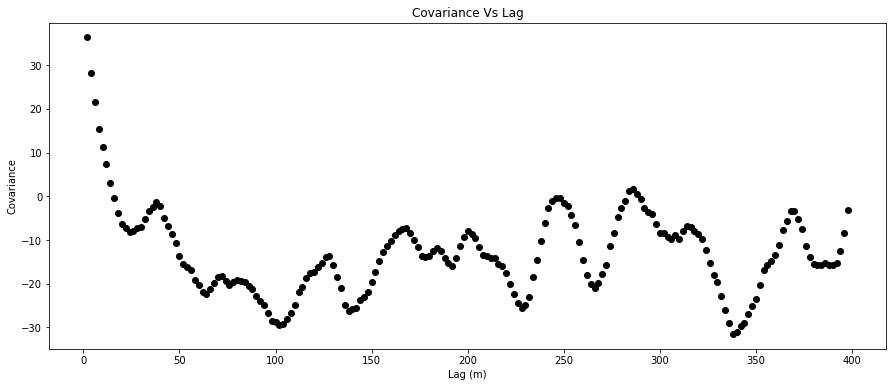

In [65]:
plot_covariance(dist,acc, figsize = (15,6))

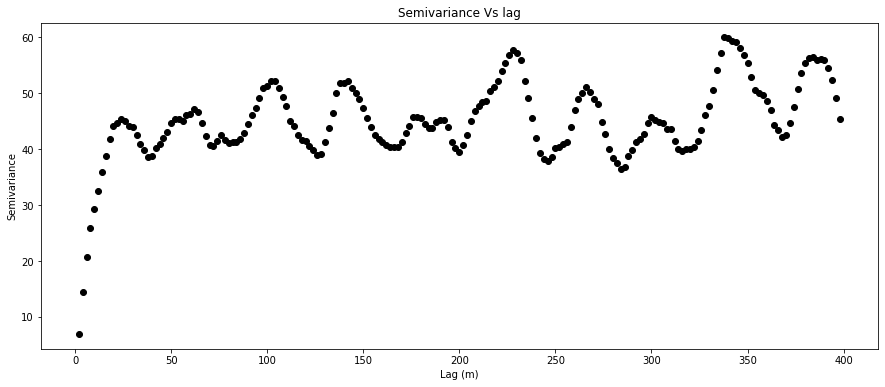

In [67]:
plot_variogram(dist,acc, figsize = (15,6))

**Model Variogram**

In [69]:
test2 = variogramModel()
a = 25
c = 45
h = test.h
test2.solve(h,c,a,type_ = 'L')

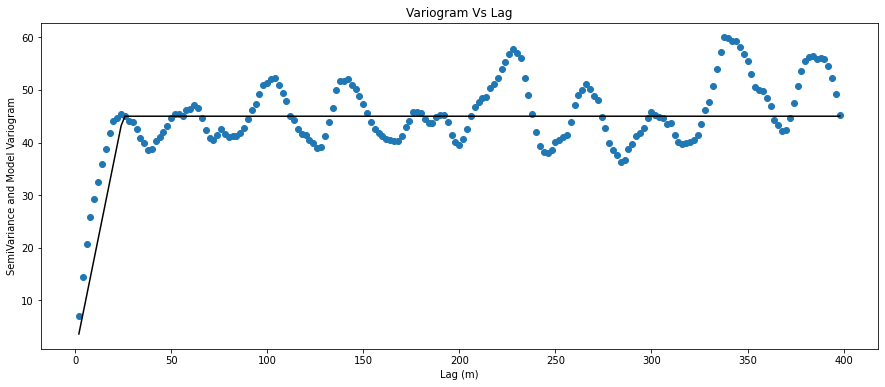

In [70]:
plt.figure(figsize = (15,6))
plt.scatter(test.h, test.semi_var_)
plt.plot(test.h, test2.Vm, 'k')
plt.ylabel('SemiVariance and Model Variogram')
plt.title('Variogram Vs Lag')
plt.xlabel('Lag (m)') # # labelx axis
plt.show;

**Implementation Variogram Error**\
**Brute Force**

In [71]:
a = np.arange(1,61)
c = np.arange(30,60)

In [72]:
V = test.semi_var_
h = test.h
type_ = 'L'

In [73]:
n = len(a)
m = len(c)
rmse = np.zeros((n,m))

for i in range(len(a)):
    for j in range(len(c)):
        res = variogramModelError()
        res.solve(h,V,c[j],a[i],type_)
        rmse[i,j] = res.rmse

In [74]:
rmse

array([[16.61364141, 15.71213894, 14.82327694, ..., 13.82697599,
        14.69841808, 15.58530472],
       [16.54044543, 15.62715245, 14.72478869, ..., 13.37313647,
        14.25450739, 15.1502849 ],
       [16.55895953, 15.64961217, 14.75181338, ..., 13.54408711,
        14.42230087, 15.31527492],
       ...,
       [18.54458898, 17.71818971, 16.90465737, ..., 12.91641662,
        13.6193221 , 14.35056719],
       [18.33585228, 17.49519512, 16.66636035, ..., 12.54179138,
        13.26548653, 14.01631465],
       [18.63570365, 17.81378558, 17.00489602, ..., 12.96584479,
        13.65991694, 14.38289109]])

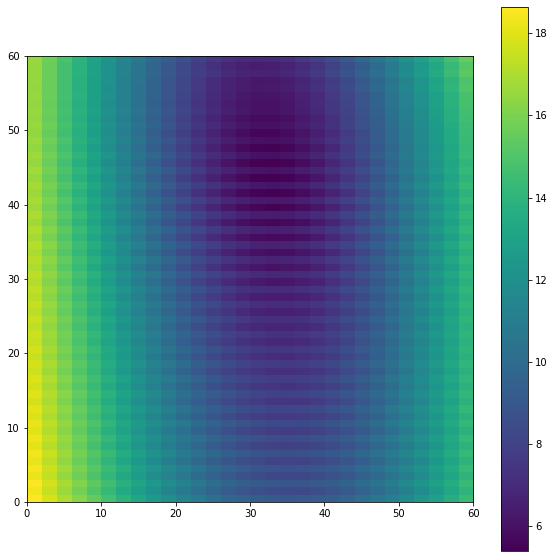

In [75]:
plt.figure(figsize = (10,10))
c = plt.imshow(rmse,extent=[0, 60, 0, 60],)
plt.colorbar(c)
plt.show()

**Using Scipy Optimize**

In [76]:
from scipy import optimize

In [77]:
def model_variogram_error(h,V,c,a,type_):
    """
    Variogram using the bounded linear and spherical models
    
    INPUT:
        h = lags
        c = sill
        a = range
        typre_ 'L' for linear and 'S' for spherical
       
    OUTPUT:
    """
    Vm = np.zeros(len(h))
    Ix = np.where(h < a)
    
    if (type_ == 'L'):
         #lags less than a
        Vm[Ix] = c*h[Ix]/a  # Linear 
    elif (type_ == 'S'):
        Vm[Ix] = c*(3*h[Ix]/(2*a) - 0.5*(h[Ix]/a)**3) # Spherical 
        
    Ix2 = np.where(h>a) # lags greater than a
    Vm[Ix2] = c
    
    rmse = np.sqrt(np.mean((Vm - V)**2))
    
    return rmse

In [78]:
import scipy.optimize as optimize

def f(params):
    c, a = params 
    return model_variogram_error(h,V,c,a,'L')

initial_guess = [30, 60]

result = optimize.minimize(f, initial_guess)
if result.success:
    fitted_params = result.x
    print(result.fun, fitted_params)
else:
    raise ValueError(result.message)

5.4000763517752635 [45.88834852 16.95981832]


In [79]:
result

      fun: 5.4000763517752635
 hess_inv: array([[ 5.96745118,  1.98741676],
       [ 1.98741676, 52.46350179]])
      jac: array([ 2.98023224e-06, -1.78813934e-07])
  message: 'Optimization terminated successfully.'
     nfev: 228
      nit: 57
     njev: 76
   status: 0
  success: True
        x: array([45.88834852, 16.95981832])

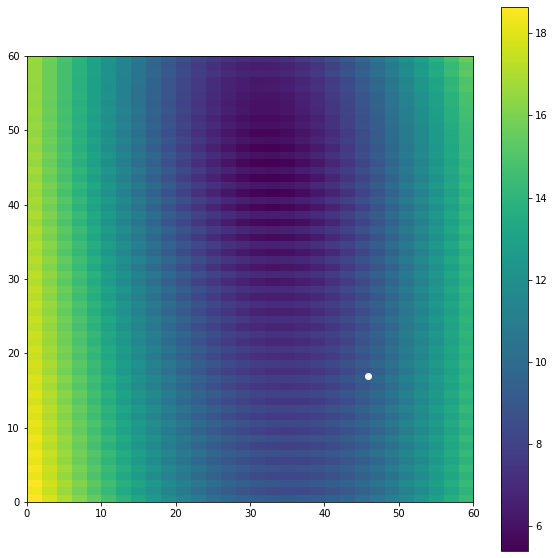

In [80]:
plt.figure(figsize = (10,10))
c = plt.imshow(rmse,extent=[0, 60, 0, 60],)
plt.colorbar(c)
plt.plot(fitted_params[0], fitted_params[1], 'wo')
plt.show()

**KRIGING** 

$$C_{i0} = \sum_{j-1}^{n} w_j C_{ij}+ \mu$$ for $i =1:n$
$$\sum w_i = 1$$

$C_{i0}$  =The covariance of between the place you want the estimate and all other available data point

We will be using the python package pykrige 

In [120]:
from scipy.io import loadmat
import pandas as pd
import scipy
import numpy as np

#python krigging libraries
import pykrige as pk
import pykrige.kriging_tools as kt

#plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv('RabbitEarsDepths.txt', sep="   ", header = None, engine ='python')

In [83]:
df.columns = ['X','Y','Z','D']

In [84]:
df.head()

,X,Y,Z,D
0,5.558107,16.040190,2900.3904,107.18202
1,7.566076,25.288089,2900.6721,124.83553
2,7.640988,35.176619,2901.8196,116.63926
3,8.727628,45.160013,2902.0159,107.18202
4,9.838875,54.921632,2901.4739,109.07347


In [86]:
x = df['X']
y = df['Y']
z = df['Z']
D = df['D']

/home/eviofekeze/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


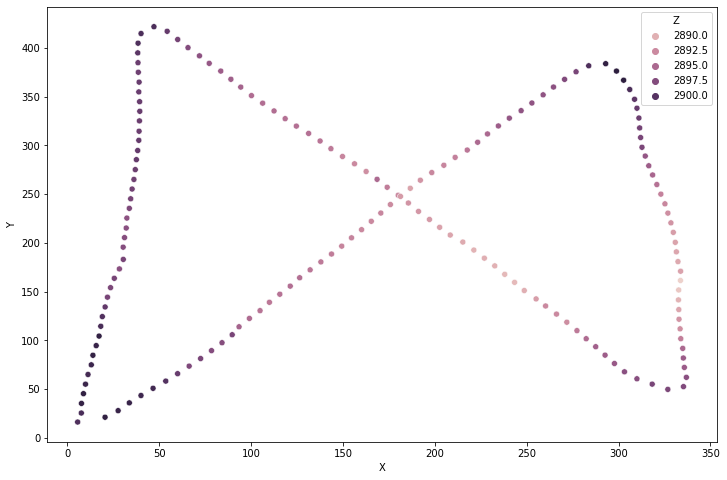

In [88]:
plt.figure(figsize=(12,8))
sns.scatterplot(x,y,z)
plt.show()

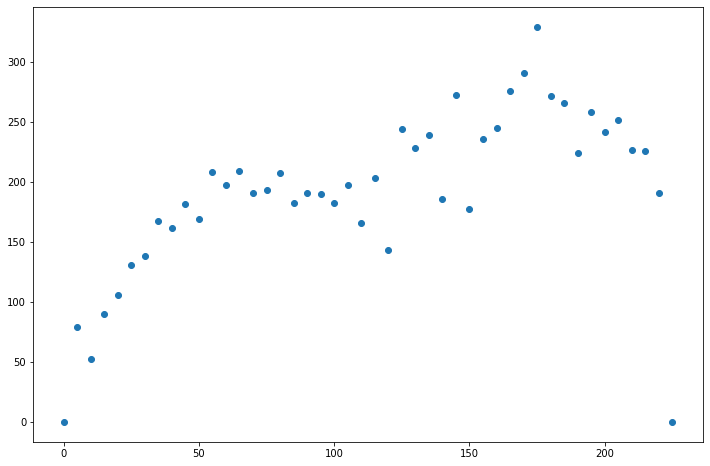

In [109]:
# Experimental Variogram

#Initialise  variables 
dist = np.zeros([len(x), len(x)])
gam = np.zeros([len(x), len(x)])


for i in range(0,len(x)-1):
    for j in range(i+1, len(x)):
        dist[i,j] = np.sqrt((x[i]-x[j])**2 +(y[i]-y[j])**2) #Distanve between two points
        gam[i,j]= (D[i] - D[j])**2

        
#Fill the other side of the Matrix
dist = dist+dist.T
# gam = gam+gam

#Lag Distance for estimating the semivariance
hmod = np.arange(0,226,5)

#Initialse semivariogram vector
G = np.zeros([1,len(hmod)])


#find poin within lag range
for k in range(0,len(hmod)-1):
    Ix  = np.logical_and(dist >= hmod[k], dist<= hmod[k+1])
    G[0,k] = 0.5*np.mean(gam[Ix])

G = G.reshape(46,1)
hmod = hmod.reshape(46,1)

plt.figure(figsize=(12,8))
plt.plot(hmod,G, 'o')
plt.show()

In [110]:
#Helper Functions
def model_variogram(h,c,a,type):
    V = np.zeros(len(h))
    for i in range(len(h)):
        if(h[i]<=a):
            if (type == 'L'):
                V[i] = c*h[i]/a
            elif(type == 'S'):
                V[i] = c*( (3*h[i])/(2*a) - ((0.5*h[i])/a)**3)
        elif(h[i]>a):
            V[i] = c
    return V

def model_variogram_error(h,V,c,a,type):
    Vm = np.zeros(len(h))
    for i in range(len(h)):
        if(h[i]<=a):
            if (type == 'L'):
                Vm[i] = c*h[i]/a
            elif(type == 'S'):
                Vm[i] = c*( (3*h[i])/(2*a) - ((0.5*h[i])/a)**3)
        elif(h[i]>a):
            Vm[i] = c
    rmse = np.sqrt(np.nanmean((Vm-V)**2))

    return rmse

In [111]:
model_variogram_error(hmod,G,450,50,'S')

262.48116823581677

In [112]:
#Use Fmin search to get best varigram parameters
func_ = lambda x: model_variogram_error(hmod,G, p0[0],p0[1],'S')
p0 = [300,50]
[pbest, fval] = scipy.optimize.fmin(func_, x0 = [300,50])

Optimization terminated successfully.
         Current function value: 133.783178
         Iterations: 19
         Function evaluations: 75


In [113]:
Vmod = model_variogram(hmod, 215.14, 64.93, 'S')

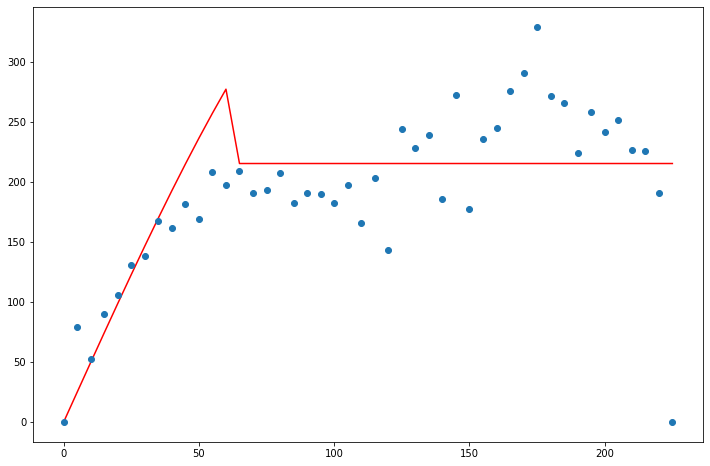

In [114]:
plt.figure(figsize=(12,8))
plt.plot(hmod,Vmod,'r')
plt.plot(hmod,G, 'o')

In [115]:
model_variogram(hmod,215.14,64.93,'S')

array([  0.        ,  24.83832816,  49.6029752 ,  74.22025999,
        98.61650142, 122.71801836, 146.45112968, 169.74215428,
       192.51741101, 214.70321877, 236.22589643, 257.01176287,
       276.98713696, 215.14      , 215.14      , 215.14      ,
       215.14      , 215.14      , 215.14      , 215.14      ,
       215.14      , 215.14      , 215.14      , 215.14      ,
       215.14      , 215.14      , 215.14      , 215.14      ,
       215.14      , 215.14      , 215.14      , 215.14      ,
       215.14      , 215.14      , 215.14      , 215.14      ,
       215.14      , 215.14      , 215.14      , 215.14      ,
       215.14      , 215.14      , 215.14      , 215.14      ,
       215.14      , 215.14      ])

In [116]:
gridx = np.arange(0.0,351.0,10)
gridy = np.arange(0.0,451.0,10)

In [117]:
temp = pk.OrdinaryKriging(x,y,D, variogram_model='spherical')
z, ss = temp.execute("grid", gridx, gridy)

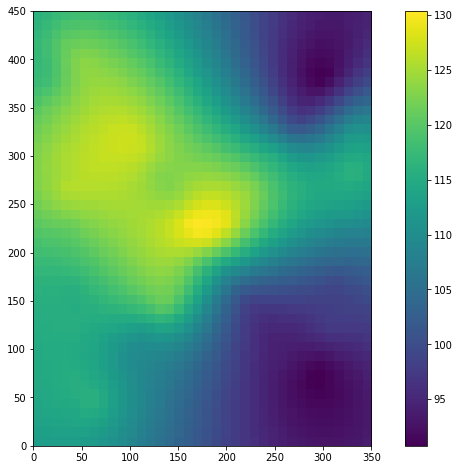

In [118]:
plt.figure(figsize=(12,8))
kt.write_asc_grid(gridx, gridy, z, filename='output.asc')
cm = plt.imshow(z,extent=[0,350,0,450])
plt.colorbar(cm)
plt.show()

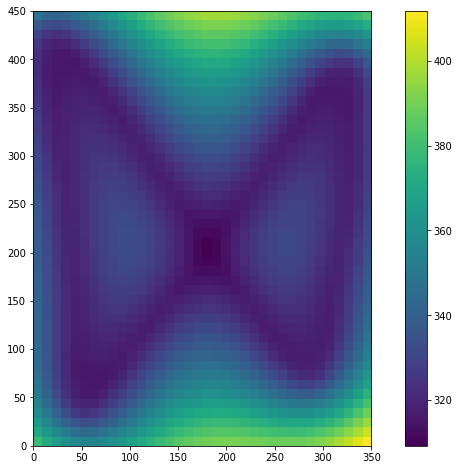

In [119]:
plt.figure(figsize=(12,8))
kt.write_asc_grid(gridx, gridy, ss, filename='output.asc')
cm = plt.imshow(ss,extent=[0,350,0,450])
plt.colorbar(cm)
plt.show()